In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"C:\Users\dell\Downloads\datasets\email2\spam_assassin.csv")

In [3]:
df = data
df.shape

(5796, 2)

In [4]:
df.tail()

,text,target
5791,From ilug-admin@linux.ie Mon Jul 22 18:12:45 2...,0
5792,From fork-admin@xent.com Mon Oct 7 20:37:02 20...,0
5793,Received: from hq.pro-ns.net (localhost [127.0...,1
5794,From razor-users-admin@lists.sourceforge.net T...,0
5795,From rssfeeds@jmason.org Mon Sep 30 13:44:10 2...,0


In [5]:
df.dtypes

text      object
target     int64
dtype: object

In [6]:
df.isna().sum()

text      0
target    0
dtype: int64

In [7]:
df['target'].value_counts()

target
0    3900
1    1896
Name: count, dtype: int64

In [8]:
import nltk

In [9]:
from nltk.corpus import stopwords  # For stop word removal 
from nltk.stem import WordNetLemmatizer # For lemmatization

<Axes: ylabel='count'>

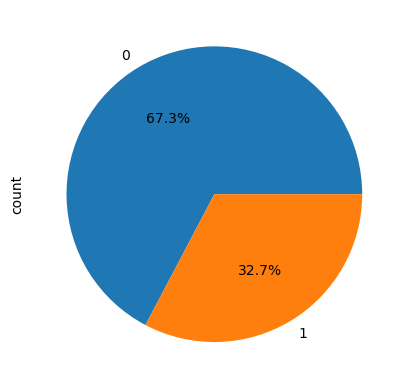

In [10]:
df['target'].value_counts().plot.pie(autopct = "%1.1f%%")

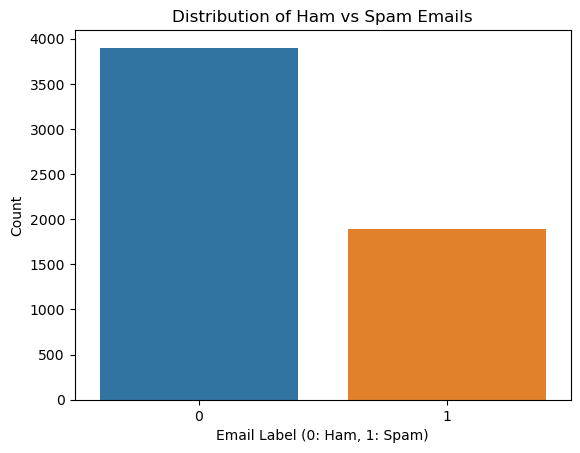

In [11]:
sns.countplot(x='target',data = df)
plt.xlabel('Email Label (0: Ham, 1: Spam)')
plt.ylabel('Count')
plt.title('Distribution of Ham vs Spam Emails')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df['text']
y = df['target']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 42)

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.utils import class_weight
from nltk.stem import PorterStemmer

In [16]:
import nltk

In [17]:
def advanced_clean_text(text):
    text = text.lower()  
    words = nltk.word_tokenize(text) 

    stop_words = set(stopwords.words('english'))
    words = [w for w in words if w not in stop_words]

    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(w) for w in words]

    return " ".join(stemmed_words) 

In [18]:
X = X.apply(advanced_clean_text)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 42, stratify = y)

In [20]:
tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(X_train)  
X_test = tfidf.transform(X_test) 

# Handling Class Imbalance by Class weight

In [21]:
class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                  classes=np.unique(y_train), 
                                                  y=y_train)
class_weights_dict = {0: class_weights[0], 1: class_weights[1]}

In [22]:
class_weights

array([0.74318692, 1.52801582])

In [23]:
class_weights_dict

{0: 0.7431869188842578, 1: 1.5280158206987475}

# Model Building and evaluation

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Logictic Regression

In [25]:
model = LogisticRegression(class_weight=class_weights_dict) 
model.fit(X_train, y_train) 

LogisticRegression(class_weight={0: 0.7431869188842578, 1: 1.5280158206987475})

In [26]:
y_pred = model.predict(X_test)

In [27]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.978448275862069
Confusion Matrix:
 [[775   6]
 [ 19 360]]


In [28]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))

Accuracy: 0.978448275862069
Confusion Matrix:
 [[775   6]
 [ 19 360]]
Precision: 0.9836065573770492
Recall: 0.9498680738786279
F1-Score: 0.9664429530201343


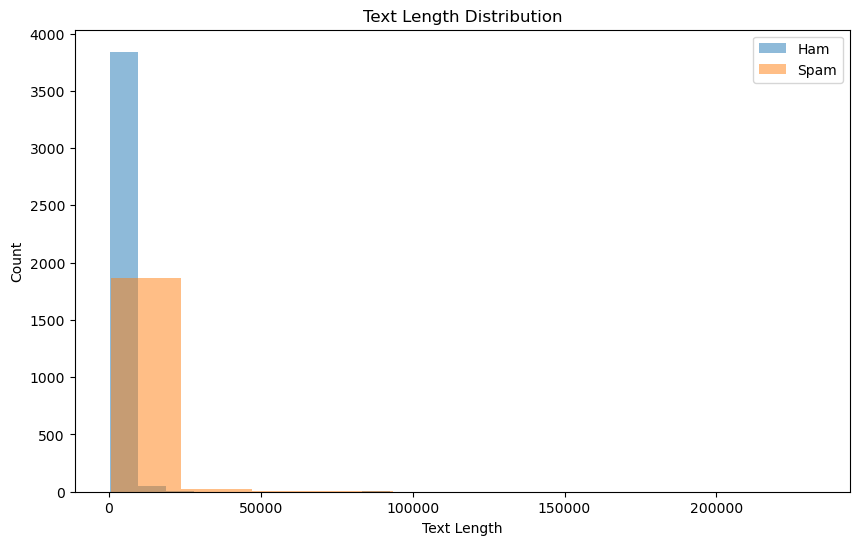

In [29]:
# Text length analysis
data['text_length'] = data['text'].apply(len)
plt.figure(figsize=(10,6))
plt.hist(data[data['target'] == 0]['text_length'], alpha=0.5, label='Ham')
plt.hist(data[data['target'] == 1]['text_length'], alpha=0.5, label='Spam')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.title('Text Length Distribution')
plt.legend()
plt.show()

# Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

# Make predictions on the test data using the fitted model
y_pred_dt = model_dt.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))  
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1-Score:", f1_score(y_test, y_pred_dt))

Accuracy: 0.9767241379310345
Confusion Matrix:
 [[767  14]
 [ 13 366]]
Precision: 0.9631578947368421
Recall: 0.9656992084432717
F1-Score: 0.9644268774703557


# Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators = 100)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf)) 
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-Score:", f1_score(y_test, y_pred_rf))

Accuracy: 0.9793103448275862
Confusion Matrix:
 [[777   4]
 [ 20 359]]
Precision: 0.9889807162534435
Recall: 0.9472295514511874
F1-Score: 0.967654986522911
